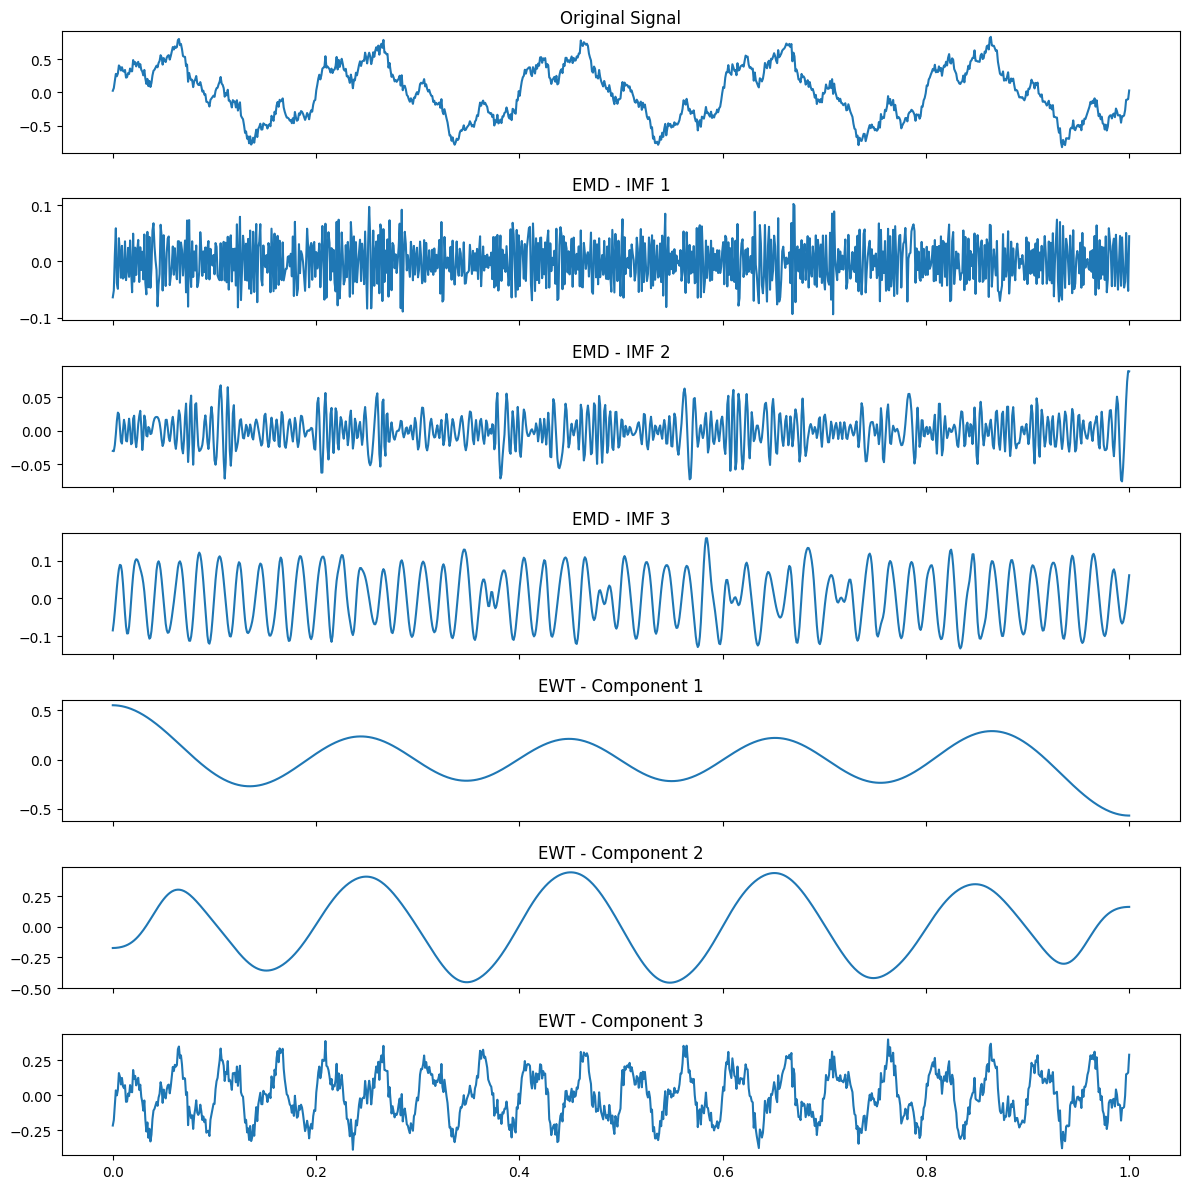

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EMD
from ewtpy import EWT1D

# Step 1: Create a realistic composite signal
np.random.seed(42)
t = np.linspace(0, 1, 1000)
signal = (0.5 * np.sin(2 * np.pi * 5 * t) +        # Low-freq
          0.2 * np.sin(2 * np.pi * 20 * t) +       # Mid-freq
          0.1 * np.sin(2 * np.pi * 50 * t) +       # High-freq
          0.05 * np.random.randn(len(t)))          # Noise

# Step 2: Apply Empirical Mode Decomposition (EMD)
emd = EMD()
imfs_emd = emd(signal)

# Step 3: Apply Empirical Wavelet Transform (EWT)
ewt_output = EWT1D(signal, N=3)

# Step 4: Handle output structure
try:
    # Try dictionary-like output (newer versions)
    ewt_components = ewt_output['ewt']
    boundaries = ewt_output['boundaries']
except (TypeError, KeyError):
    # Fall back to tuple-based output (older versions)
    ewt_components = ewt_output[0]
    boundaries = ewt_output[1]

# Step 5: Plot original signal and first 3 modes from each method
fig, axs = plt.subplots(7, 1, figsize=(12, 12), sharex=True)

axs[0].plot(t, signal)
axs[0].set_title("Original Signal")

for i in range(3):
    axs[i + 1].plot(t, imfs_emd[i])
    axs[i + 1].set_title(f"EMD - IMF {i + 1}")

ewt_components = np.array(ewt_components)
# Transpose if time is along rows instead of columns
if ewt_components.shape[0] == len(t):
    ewt_components = ewt_components.T  # Now shape: (num_components, time)


for i in range(min(3, len(ewt_components))):
    axs[i + 4].plot(t, ewt_components[i])
    axs[i + 4].set_title(f"EWT - Component {i + 1}")



plt.tight_layout()
plt.show()
